In [1]:
from sampl_pH_0_12 import SAMPL6DataProvider
import pandas as pd
import numpy as np

In [2]:
# molecules with known microstates
mol_IDs = ["SM07", "SM02", "SM04", "SM09", "SM12", "SM13", "SM14", "SM15"]

df_exp_microstates = pd.read_csv("experimental_microstates_with_charge.csv")
df_exp_microstates

,Microstate ID of A,Charge of A,Microstate ID of HA,Charge of HA,Molecule ID,pKa (exp),pKa SEM (exp),pKa ID,Microstate identification source
0,SM07_micro004,0,SM07_micro006,1,SM07,6.08,0.01,SM07_pKa1,NMR measurement
1,SM14_micro001,0,SM14_micro002,1,SM14,5.30,0.01,SM14_pKa2,NMR measurement
2,SM14_micro002,1,SM14_micro003,2,SM14,2.58,0.01,SM14_pKa1,NMR measurement
3,SM02_micro002,0,SM02_micro004,1,SM02,5.03,0.01,SM02_pKa1,Estimated based on SM07 NMR measurement
4,SM04_micro003,0,SM04_micro002,1,SM04,6.02,0.01,SM04_pKa1,Estimated based on SM07 NMR measurement
5,SM09_micro003,0,SM09_micro001,1,SM09,5.37,0.01,SM09_pKa1,Estimated based on SM07 NMR measurement
6,SM12_micro012,0,SM12_micro006,1,SM12,5.28,0.01,SM12_pKa1,Estimated based on SM07 NMR measurement
7,SM13_micro005,0,SM13_micro001,1,SM13,5.77,0.01,SM13_pKa1,Estimated based on SM07 NMR measurement
8,SM15_micro004,-1,SM15_micro002,0,SM15,8.94,0.01,SM15_pKa2,Estimated based on SM14 NMR measurement
9,SM15_micro002,0,SM15_micro003,1,SM15,4.70,0.01,SM15_pKa1,Estimated based on SM14 NMR measurement


1. calculate $\Delta G$ of each microstate at pH 0
2. determine lowest energy tautomer of each charge state
3. compare sequence of predicted dominant states to experimental states

# 1. Analyze microstates of Jaguar submission

In [3]:
jaguartypei = SAMPL6DataProvider("typeI-raw-jaguar.csv", "typei", "Jaguar", bootstrap_options={"n_samples": 1})
exp = SAMPL6DataProvider("SAMPL6_experimental_pkas.csv", "exp", "Experiment", bootstrap_options={"n_samples": 3})
#"experimental_microstates.csv"
jaguartypei.__dict__

{'file_path': '/Users/isikm/lab/SAMPL6-repos/sampl6-physicochemical-properties/analysis_of_pKa_predictions/20191003_typeI_microstate_deltaG_calculation/typeI-raw-jaguar.csv',
 'data_type': 'typei',
 'method_desc': 'Jaguar',
 'label': 'Jaguar',
 'load_opts': {},
 'bootstrap_opts': {'n_samples': 1},
 '_typeiii_charge_file': None,
 'load': <function sampl_pH_0_12.SAMPL6DataProvider.__init__.<locals>.<lambda>(mol_id)>,
 'can_bootstrap': True,
 'bootstrap': <function sampl_pH_0_12.SAMPL6DataProvider.__init__.<locals>.<lambda>(mol_id, n_bootstrap)>}

In [4]:
SM07_exp = exp.load("SM07")
SM07_jag = jaguartypei.load("SM07")

# show properties as example

SM07_jag.__dict__

{'free_energies': array([[ 33.52563895,  33.24932874,  32.97301853, ...,   6.44723826,
           6.17092805,   5.89461784],
        [ 11.90436493,  11.90436493,  11.90436493, ...,  11.90436493,
          11.90436493,  11.90436493],
        [-11.95041663, -11.67410642, -11.39779621, ...,  15.12798406,
          15.40429427,  15.68060448],
        ...,
        [ -5.24989401,  -4.69727359,  -4.14465317, ...,  48.90690738,
          49.4595278 ,  50.01214822],
        [ 14.29905343,  14.85167385,  15.40429427, ...,  68.45585481,
          69.00847524,  69.56109566],
        [ 12.61816631,  13.44709694,  14.27602758, ...,  93.85336839,
          94.68229902,  95.51122966]]),
 'populations': array([[1.59710596e-20, 2.77618750e-20, 4.82542589e-20, ...,
         1.58202052e-03, 2.08445986e-03, 2.74603171e-03],
        [3.92043023e-11, 5.16950302e-11, 6.81609524e-11, ...,
         6.74857552e-06, 6.74517988e-06, 6.74070851e-06],
        [8.98118681e-01, 8.98356664e-01, 8.98536348e-01, ...,
   

In [5]:
microstate_data = []

for mol_ID in mol_IDs:
    jag_1mol = jaguartypei.load(mol_ID)
    microstate_IDs = jag_1mol.state_ids
    charges_of_microstates = jag_1mol.charges
    free_energies_of_microstates_pH0 = jag_1mol.free_energies[:,0]
    
    print(mol_ID)
    print("Microstates:\n", microstate_IDs)
    print("Charges:", charges_of_microstates)
    print("Free energies:\n",free_energies_of_microstates_pH0)
    print()
    
    for i, microstate_ID in enumerate(microstate_IDs):
    
        microstate_data.append({
            'Molecule ID': mol_ID,
            'Microstate ID': microstate_ID,
            'Charge': charges_of_microstates[i],
            '$\Delta$G (pH=0)': free_energies_of_microstates_pH0[i]
        })

df_microstate_data = pd.DataFrame(data=microstate_data)
df_microstate_data

SM07
Microstates:
 ['SM07_micro012', 'SM07_micro002', 'SM07_micro006', 'SM07_micro003', 'SM07_micro007', 'SM07_micro004', 'SM07_micro011', 'SM07_micro013', 'SM07_micro014', 'SM07_micro015', 'SM07_micro016']
Charges: [-1  0  1  0  1  0  1  2  2  2  3]
Free energies:
 [ 33.52563895  11.90436493 -11.95041663   8.40443559  -9.76296079
   0.           6.1018505    6.93078113  -5.24989401  14.29905343
  12.61816631]

SM02
Microstates:
 ['SM02_micro011', 'SM02_micro002', 'SM02_micro004', 'SM02_micro005', 'SM02_micro006', 'SM02_micro003', 'SM02_micro007', 'SM02_micro008', 'SM02_micro012', 'SM02_micro013', 'SM02_micro014']
Charges: [-1  0  1  1  1  0  0  2  2  2  3]
Free energies:
 [26.73301293  0.         -9.18731452 -6.1479022  15.45034597  4.8354287
  6.88472943 15.19706161  3.84531711 30.90069195 41.69981603]

SM04
Microstates:
 ['SM04_micro005', 'SM04_micro003', 'SM04_micro002', 'SM04_micro004', 'SM04_micro013', 'SM04_micro014', 'SM04_micro006', 'SM04_micro008', 'SM04_micro009', 'SM04_micr

,$\Delta$G (pH=0),Charge,Microstate ID,Molecule ID
0,33.525639,-1,SM07_micro012,SM07
1,11.904365,0,SM07_micro002,SM07
2,-11.950417,1,SM07_micro006,SM07
3,8.404436,0,SM07_micro003,SM07
4,-9.762961,1,SM07_micro007,SM07
5,0.000000,0,SM07_micro004,SM07
6,6.101850,1,SM07_micro011,SM07
7,6.930781,2,SM07_micro013,SM07
8,-5.249894,2,SM07_micro014,SM07
9,14.299053,2,SM07_micro015,SM07


In [6]:
df_microstate_data_charge0 = df_microstate_data[(df_microstate_data["Molecule ID"] == "SM07") & (df_microstate_data["Charge"] == 0)]
df_microstate_data_charge0

,$\Delta$G (pH=0),Charge,Microstate ID,Molecule ID
1,11.904365,0,SM07_micro002,SM07
3,8.404436,0,SM07_micro003,SM07
5,0.000000,0,SM07_micro004,SM07


In [7]:
dominant_microstate = df_microstate_data_charge0.loc[df_microstate_data_charge0['$\Delta$G (pH=0)'].idxmin()]["Microstate ID"]
dominant_microstate

'SM07_micro004'

In [8]:
pred_mol_IDs = set(df_microstate_data["Molecule ID"].values)
pred_mol_IDs

{'SM02', 'SM04', 'SM07', 'SM09', 'SM12', 'SM13', 'SM14', 'SM15'}

In [9]:
# Create dataframe to store dominant predicted microstate ID of each charge

submission_ID = "jaguar"

df_dominant_ms = pd.DataFrame(columns=["receipt_id", "Molecule ID", "charge -4", "charge -3","charge -2", "charge -1","charge 0",
                                       "charge 1","charge 2", "charge 3", "charge 4"])
for i, mol_ID in enumerate(pred_mol_IDs): 
    df_dominant_ms.loc[i] = [submission_ID, mol_ID, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN ]
df_dominant_ms

,receipt_id,Molecule ID,charge -4,charge -3,charge -2,charge -1,charge 0,charge 1,charge 2,charge 3,charge 4
0,jaguar,SM07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,jaguar,SM13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,jaguar,SM04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,jaguar,SM02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,jaguar,SM14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,jaguar,SM15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,jaguar,SM12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,jaguar,SM09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Populate dominant microstate dataframe

for mol_ID in pred_mol_IDs:
    df_1mol = df_microstate_data[df_microstate_data["Molecule ID"] == mol_ID]
    charges = set(df_1mol["Charge"].values)

    for charge in charges:
        df_1mol_1charge = df_1mol[df_1mol["Charge"] == charge]
        dominant_microstate = df_1mol_1charge.loc[df_1mol_1charge['$\Delta$G (pH=0)'].idxmin()]["Microstate ID"]
        df_dominant_ms.loc[(df_dominant_ms["Molecule ID"] == mol_ID), "charge {}".format(charge)] = dominant_microstate
        #print("Charge {}, {}".format(charge, dominant_microstate))

# Save as CSV
df_dominant_ms.to_csv("typeI_submission_dominant_microstate_collection_only_predictions.csv", index=False)

In [11]:
# Compare predicted dominant microstate collection to experimental dominant microstates
# Read predictied dominant microstate collection
df_pred_dom_ms = pd.read_csv("typeI_submission_dominant_microstate_collection_only_predictions.csv")
df_pred_dom_ms

,receipt_id,Molecule ID,charge -4,charge -3,charge -2,charge -1,charge 0,charge 1,charge 2,charge 3,charge 4
0,jaguar,SM07,NaN,NaN,NaN,SM07_micro012,SM07_micro004,SM07_micro006,SM07_micro014,SM07_micro016,NaN
1,jaguar,SM13,NaN,NaN,NaN,SM13_micro004,SM13_micro005,SM13_micro001,SM13_micro013,SM13_micro015,NaN
2,jaguar,SM04,NaN,NaN,NaN,SM04_micro005,SM04_micro003,SM04_micro002,SM04_micro014,SM04_micro016,NaN
3,jaguar,SM02,NaN,NaN,NaN,SM02_micro011,SM02_micro002,SM02_micro004,SM02_micro012,SM02_micro014,NaN
4,jaguar,SM14,NaN,NaN,NaN,SM14_micro006,SM14_micro001,SM14_micro002,SM14_micro003,NaN,NaN
5,jaguar,SM15,NaN,NaN,NaN,SM15_micro004,SM15_micro002,SM15_micro003,NaN,NaN,NaN
6,jaguar,SM12,NaN,NaN,NaN,SM12_micro009,SM12_micro012,SM12_micro006,SM12_micro013,SM12_micro015,NaN
7,jaguar,SM09,NaN,NaN,NaN,SM09_micro009,SM09_micro003,SM09_micro001,SM09_micro013,SM09_micro015,NaN


In [12]:
# Read experimental dominant microstates
exp_microstates = pd.read_csv("experimental_microstates_with_charge.csv")
exp_microstates

,Microstate ID of A,Charge of A,Microstate ID of HA,Charge of HA,Molecule ID,pKa (exp),pKa SEM (exp),pKa ID,Microstate identification source
0,SM07_micro004,0,SM07_micro006,1,SM07,6.08,0.01,SM07_pKa1,NMR measurement
1,SM14_micro001,0,SM14_micro002,1,SM14,5.30,0.01,SM14_pKa2,NMR measurement
2,SM14_micro002,1,SM14_micro003,2,SM14,2.58,0.01,SM14_pKa1,NMR measurement
3,SM02_micro002,0,SM02_micro004,1,SM02,5.03,0.01,SM02_pKa1,Estimated based on SM07 NMR measurement
4,SM04_micro003,0,SM04_micro002,1,SM04,6.02,0.01,SM04_pKa1,Estimated based on SM07 NMR measurement
5,SM09_micro003,0,SM09_micro001,1,SM09,5.37,0.01,SM09_pKa1,Estimated based on SM07 NMR measurement
6,SM12_micro012,0,SM12_micro006,1,SM12,5.28,0.01,SM12_pKa1,Estimated based on SM07 NMR measurement
7,SM13_micro005,0,SM13_micro001,1,SM13,5.77,0.01,SM13_pKa1,Estimated based on SM07 NMR measurement
8,SM15_micro004,-1,SM15_micro002,0,SM15,8.94,0.01,SM15_pKa2,Estimated based on SM14 NMR measurement
9,SM15_micro002,0,SM15_micro003,1,SM15,4.70,0.01,SM15_pKa1,Estimated based on SM14 NMR measurement


In [13]:
# Organize experimental microstate in dominant microstate collection format

# Create empty dataframe
df_exp_dom_ms = pd.DataFrame(columns=[ "Molecule ID", "charge -4", "charge -3","charge -2", "charge -1","charge 0",
                                       "charge 1","charge 2", "charge 3", "charge 4"])
charges = np.arange(-4,4,1)
exp_mol_IDs = set(exp_microstates["Molecule ID"].values)

for i, mol_ID in enumerate(exp_mol_IDs): 
    df_exp_dom_ms.loc[i] = [mol_ID, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN ]

# Make molecule ID the index

df_exp_dom_ms = df_exp_dom_ms.set_index("Molecule ID", drop = False)

In [14]:
# Populate expermental dominant microstate collection
for i, mol_ID in enumerate(exp_mol_IDs): 
    for charge in charges:
        #print("mol {}, charge {}".format(mol_ID, charge))
        exp_ms_1mol = exp_microstates[exp_microstates["Molecule ID"] == mol_ID]
        #print("exp_ms_1mol:\n",exp_ms_1mol)
        
        # Check if charge exist in "Charge of A" column
        exp_charge_of_A = exp_ms_1mol["Charge of A"].values
        exp_charge_of_HA = exp_ms_1mol["Charge of HA"].values
        #print("exp_charge_of_A:", exp_charge_of_A)
        #print("exp_charge_of_HA:", exp_charge_of_HA)
        
        if charge in exp_charge_of_A:
            #print("Charges match A.")
            #exp_dom_ms_ID =  exp_ms_1mol["Microstate ID of A"].values
            exp_dom_ms_ID = exp_ms_1mol[exp_ms_1mol["Charge of A"] == charge]["Microstate ID of A"].values[0]
        elif charge in exp_charge_of_HA:
            #print("Charges match HA.")
            #exp_dom_ms_ID =  exp_ms_1mol["Microstate ID of HA"].values
            exp_dom_ms_ID = exp_ms_1mol[exp_ms_1mol["Charge of HA"] == charge]["Microstate ID of HA"].values[0]
        else:
            #print("Different charge")
            exp_dom_ms_ID = np.NaN
        
        #print("exp_dom_ms_ID:", exp_dom_ms_ID)
        
        df_exp_dom_ms.loc[mol_ID, "charge {}".format(charge)] = exp_dom_ms_ID

df_exp_dom_ms.to_csv("typeI_submission_dominant_microstate_collection_only_experiments.csv", index=False)
df_exp_dom_ms

,Molecule ID,charge -4,charge -3,charge -2,charge -1,charge 0,charge 1,charge 2,charge 3,charge 4
Molecule ID,,,,,,,,,,
SM07,SM07,NaN,NaN,NaN,NaN,SM07_micro004,SM07_micro006,NaN,NaN,NaN
SM13,SM13,NaN,NaN,NaN,NaN,SM13_micro005,SM13_micro001,NaN,NaN,NaN
SM04,SM04,NaN,NaN,NaN,NaN,SM04_micro003,SM04_micro002,NaN,NaN,NaN
SM02,SM02,NaN,NaN,NaN,NaN,SM02_micro002,SM02_micro004,NaN,NaN,NaN
SM14,SM14,NaN,NaN,NaN,NaN,SM14_micro001,SM14_micro002,SM14_micro003,NaN,NaN
SM15,SM15,NaN,NaN,NaN,SM15_micro004,SM15_micro002,SM15_micro003,NaN,NaN,NaN
SM12,SM12,NaN,NaN,NaN,NaN,SM12_micro012,SM12_micro006,NaN,NaN,NaN
SM09,SM09,NaN,NaN,NaN,NaN,SM09_micro003,SM09_micro001,NaN,NaN,NaN


In [15]:
# Create collection file with both experimental and predicted microstate IDs

# Read experimental data collection
df_exp_dom_ms = pd.read_csv("typeI_submission_dominant_microstate_collection_only_experiments.csv")
                           
# Read predicted microstates collections
df_pred_dom_ms = pd.read_csv("typeI_submission_dominant_microstate_collection_only_predictions.csv")

# TO-DO: Merge these dataframes create the collection file

In [16]:
df_pred_dom_ms

,receipt_id,Molecule ID,charge -4,charge -3,charge -2,charge -1,charge 0,charge 1,charge 2,charge 3,charge 4
0,jaguar,SM07,NaN,NaN,NaN,SM07_micro012,SM07_micro004,SM07_micro006,SM07_micro014,SM07_micro016,NaN
1,jaguar,SM13,NaN,NaN,NaN,SM13_micro004,SM13_micro005,SM13_micro001,SM13_micro013,SM13_micro015,NaN
2,jaguar,SM04,NaN,NaN,NaN,SM04_micro005,SM04_micro003,SM04_micro002,SM04_micro014,SM04_micro016,NaN
3,jaguar,SM02,NaN,NaN,NaN,SM02_micro011,SM02_micro002,SM02_micro004,SM02_micro012,SM02_micro014,NaN
4,jaguar,SM14,NaN,NaN,NaN,SM14_micro006,SM14_micro001,SM14_micro002,SM14_micro003,NaN,NaN
5,jaguar,SM15,NaN,NaN,NaN,SM15_micro004,SM15_micro002,SM15_micro003,NaN,NaN,NaN
6,jaguar,SM12,NaN,NaN,NaN,SM12_micro009,SM12_micro012,SM12_micro006,SM12_micro013,SM12_micro015,NaN
7,jaguar,SM09,NaN,NaN,NaN,SM09_micro009,SM09_micro003,SM09_micro001,SM09_micro013,SM09_micro015,NaN


In [17]:
# Dominant microstate collection
df_dom_ms_col = pd.DataFrame(columns=["receipt_id","Molecule ID", "charge -4 (calc)", "charge -3 (calc)",
                                      "charge -2 (calc)", "charge -1 (calc)","charge 0 (calc)",
                                       "charge 1 (calc)","charge 2 (calc)", "charge 3 (calc)", "charge 4 (calc)",
                                     "charge -1 (exp)", "charge 0 (exp)", "charge 1 (exp)", "charge 2 (exp)"])
df_dom_ms_col

,receipt_id,Molecule ID,charge -4 (calc),charge -3 (calc),charge -2 (calc),charge -1 (calc),charge 0 (calc),charge 1 (calc),charge 2 (calc),charge 3 (calc),charge 4 (calc),charge -1 (exp),charge 0 (exp),charge 1 (exp),charge 2 (exp)


In [18]:
# Record data in a list to later convert to a dataframe
dominant_microstate_records = []

receipt_id_list = ["jaguar"]

for receipt_id in receipt_id_list:
    df_1method = df_pred_dom_ms[df_pred_dom_ms.receipt_id == receipt_id]
    for i, row in df_1method.iterrows():
        mol_ID = row["Molecule ID"]
        
        # Find the matching row from experimental dominant microstate dataframe using the mol_ID
        exp_row = df_exp_dom_ms[df_exp_dom_ms["Molecule ID"] == mol_ID]
        #print(exp_row)
        mol_ID_exp = exp_row["Molecule ID"].values[0]
        
        
        # Append to a list to later save as a CSV
        dominant_microstate_records.append({
            'receipt_id': receipt_id,
            'Molecule ID': row["Molecule ID"],
            'charge -4 (calc)': row["charge -4"],
            'charge -3 (calc)': row["charge -3"],
            'charge -2 (calc)': row["charge -2"],
            'charge -1 (calc)': row["charge -1"],
            'charge 0 (calc)': row["charge 0"],
            'charge 1 (calc)': row["charge 1"],
            'charge 2 (calc)': row["charge 2"],
            'charge 3 (calc)': row["charge 3"],
            'charge 4 (calc)': row["charge 4"],
            'charge -1 (exp)': exp_row["charge -1"].values[0],
            'charge 0 (exp)': exp_row["charge 0"].values[0],
            'charge 1 (exp)': exp_row["charge 1"].values[0],
            'charge 2 (exp)': exp_row["charge 2"].values[0],
        })
        
# Transform into Pandas DataFrame.
df_dom_ms_col = pd.DataFrame(data=dominant_microstate_records)
df_dom_ms_col

,Molecule ID,charge -1 (calc),charge -1 (exp),charge -2 (calc),charge -3 (calc),charge -4 (calc),charge 0 (calc),charge 0 (exp),charge 1 (calc),charge 1 (exp),charge 2 (calc),charge 2 (exp),charge 3 (calc),charge 4 (calc),receipt_id
0,SM07,SM07_micro012,NaN,NaN,NaN,NaN,SM07_micro004,SM07_micro004,SM07_micro006,SM07_micro006,SM07_micro014,NaN,SM07_micro016,NaN,jaguar
1,SM13,SM13_micro004,NaN,NaN,NaN,NaN,SM13_micro005,SM13_micro005,SM13_micro001,SM13_micro001,SM13_micro013,NaN,SM13_micro015,NaN,jaguar
2,SM04,SM04_micro005,NaN,NaN,NaN,NaN,SM04_micro003,SM04_micro003,SM04_micro002,SM04_micro002,SM04_micro014,NaN,SM04_micro016,NaN,jaguar
3,SM02,SM02_micro011,NaN,NaN,NaN,NaN,SM02_micro002,SM02_micro002,SM02_micro004,SM02_micro004,SM02_micro012,NaN,SM02_micro014,NaN,jaguar
4,SM14,SM14_micro006,NaN,NaN,NaN,NaN,SM14_micro001,SM14_micro001,SM14_micro002,SM14_micro002,SM14_micro003,SM14_micro003,NaN,NaN,jaguar
5,SM15,SM15_micro004,SM15_micro004,NaN,NaN,NaN,SM15_micro002,SM15_micro002,SM15_micro003,SM15_micro003,NaN,NaN,NaN,NaN,jaguar
6,SM12,SM12_micro009,NaN,NaN,NaN,NaN,SM12_micro012,SM12_micro012,SM12_micro006,SM12_micro006,SM12_micro013,NaN,SM12_micro015,NaN,jaguar
7,SM09,SM09_micro009,NaN,NaN,NaN,NaN,SM09_micro003,SM09_micro003,SM09_micro001,SM09_micro001,SM09_micro013,NaN,SM09_micro015,NaN,jaguar


In [19]:
# Save dominant microstate collection as CSV
dom_ms_collection_filepath = "typeI_dominant_microstate_collection.csv"
df_dom_ms_col.to_csv(dom_ms_collection_filepath , index=False)

# Calculate the accuracy of dominant microstates
df_dom_ms_match = df_dom_ms_col.copy()
df_dom_ms_match  = df_dom_ms_match.drop(["charge -4 (calc)", "charge -3 (calc)",
                                      "charge -2 (calc)", "charge 3 (calc)", "charge 4 (calc)"], axis=1)

charges_of_exp_ms = [-1, 0, 1, 2]
for charge in charges_of_exp_ms:
    df_dom_ms_match["charge {} match".format(str(charge))] = np.NaN
df_dom_ms_match

,Molecule ID,charge -1 (calc),charge -1 (exp),charge 0 (calc),charge 0 (exp),charge 1 (calc),charge 1 (exp),charge 2 (calc),charge 2 (exp),receipt_id,charge -1 match,charge 0 match,charge 1 match,charge 2 match
0,SM07,SM07_micro012,NaN,SM07_micro004,SM07_micro004,SM07_micro006,SM07_micro006,SM07_micro014,NaN,jaguar,NaN,NaN,NaN,NaN
1,SM13,SM13_micro004,NaN,SM13_micro005,SM13_micro005,SM13_micro001,SM13_micro001,SM13_micro013,NaN,jaguar,NaN,NaN,NaN,NaN
2,SM04,SM04_micro005,NaN,SM04_micro003,SM04_micro003,SM04_micro002,SM04_micro002,SM04_micro014,NaN,jaguar,NaN,NaN,NaN,NaN
3,SM02,SM02_micro011,NaN,SM02_micro002,SM02_micro002,SM02_micro004,SM02_micro004,SM02_micro012,NaN,jaguar,NaN,NaN,NaN,NaN
4,SM14,SM14_micro006,NaN,SM14_micro001,SM14_micro001,SM14_micro002,SM14_micro002,SM14_micro003,SM14_micro003,jaguar,NaN,NaN,NaN,NaN
5,SM15,SM15_micro004,SM15_micro004,SM15_micro002,SM15_micro002,SM15_micro003,SM15_micro003,NaN,NaN,jaguar,NaN,NaN,NaN,NaN
6,SM12,SM12_micro009,NaN,SM12_micro012,SM12_micro012,SM12_micro006,SM12_micro006,SM12_micro013,NaN,jaguar,NaN,NaN,NaN,NaN
7,SM09,SM09_micro009,NaN,SM09_micro003,SM09_micro003,SM09_micro001,SM09_micro001,SM09_micro013,NaN,jaguar,NaN,NaN,NaN,NaN


In [20]:
# Populate the dataframe with 0 (False) or 1 (True) based on match of predicted microstates to experimental.
# Iterate through molecules
for i, row in enumerate(df_dom_ms_match.iterrows()):
    #print(i)
    #print(row)
    mol_ID = row[1]["Molecule ID"]
    # Iterate through charges
    for charge in charges_of_exp_ms:
        # Compare predicted and experimental microstate
        pred_ms = df_dom_ms_col.loc[df_dom_ms_col["Molecule ID"] == mol_ID]["charge {} (calc)".format(str(charge))].values[0]
        print("Pred:",pred_ms)
        exp_ms = df_dom_ms_col.loc[df_dom_ms_col["Molecule ID"] == mol_ID]["charge {} (exp)".format(str(charge))].values[0]
        print("Exp:", exp_ms)
        
        
        # if experimental microstate doesn't exist for that charge state match value should be NaN
        if isinstance(exp_ms, str) == False:
            if np.isnan(exp_ms):
                match = np.NaN
        # if experimental and predicted microstate IDs are the same, match value should be 1 (True)
        elif pred_ms == exp_ms:
            match = 1
        else:
            match = 0
            
        print("match: ", match)
        print()
        df_dom_ms_match.loc[df_dom_ms_col["Molecule ID"] == mol_ID , "charge {} match".format(str(charge))] = match
        #print(str(charge))
        #print(pred_row)
        #print(pred_row["charge {} (calc)".format(str(charge))])
    #["charge {} match".format{charge}]
    
df_dom_ms_match

Pred: SM07_micro012
Exp: nan
match:  nan

Pred: SM07_micro004
Exp: SM07_micro004
match:  1

Pred: SM07_micro006
Exp: SM07_micro006
match:  1

Pred: SM07_micro014
Exp: nan
match:  nan

Pred: SM13_micro004
Exp: nan
match:  nan

Pred: SM13_micro005
Exp: SM13_micro005
match:  1

Pred: SM13_micro001
Exp: SM13_micro001
match:  1

Pred: SM13_micro013
Exp: nan
match:  nan

Pred: SM04_micro005
Exp: nan
match:  nan

Pred: SM04_micro003
Exp: SM04_micro003
match:  1

Pred: SM04_micro002
Exp: SM04_micro002
match:  1

Pred: SM04_micro014
Exp: nan
match:  nan

Pred: SM02_micro011
Exp: nan
match:  nan

Pred: SM02_micro002
Exp: SM02_micro002
match:  1

Pred: SM02_micro004
Exp: SM02_micro004
match:  1

Pred: SM02_micro012
Exp: nan
match:  nan

Pred: SM14_micro006
Exp: nan
match:  nan

Pred: SM14_micro001
Exp: SM14_micro001
match:  1

Pred: SM14_micro002
Exp: SM14_micro002
match:  1

Pred: SM14_micro003
Exp: SM14_micro003
match:  1

Pred: SM15_micro004
Exp: SM15_micro004
match:  1

Pred: SM15_micro002
Ex

,Molecule ID,charge -1 (calc),charge -1 (exp),charge 0 (calc),charge 0 (exp),charge 1 (calc),charge 1 (exp),charge 2 (calc),charge 2 (exp),receipt_id,charge -1 match,charge 0 match,charge 1 match,charge 2 match
0,SM07,SM07_micro012,NaN,SM07_micro004,SM07_micro004,SM07_micro006,SM07_micro006,SM07_micro014,NaN,jaguar,NaN,1.0,1.0,NaN
1,SM13,SM13_micro004,NaN,SM13_micro005,SM13_micro005,SM13_micro001,SM13_micro001,SM13_micro013,NaN,jaguar,NaN,1.0,1.0,NaN
2,SM04,SM04_micro005,NaN,SM04_micro003,SM04_micro003,SM04_micro002,SM04_micro002,SM04_micro014,NaN,jaguar,NaN,1.0,1.0,NaN
3,SM02,SM02_micro011,NaN,SM02_micro002,SM02_micro002,SM02_micro004,SM02_micro004,SM02_micro012,NaN,jaguar,NaN,1.0,1.0,NaN
4,SM14,SM14_micro006,NaN,SM14_micro001,SM14_micro001,SM14_micro002,SM14_micro002,SM14_micro003,SM14_micro003,jaguar,NaN,1.0,1.0,1.0
5,SM15,SM15_micro004,SM15_micro004,SM15_micro002,SM15_micro002,SM15_micro003,SM15_micro003,NaN,NaN,jaguar,1.0,1.0,1.0,NaN
6,SM12,SM12_micro009,NaN,SM12_micro012,SM12_micro012,SM12_micro006,SM12_micro006,SM12_micro013,NaN,jaguar,NaN,1.0,1.0,NaN
7,SM09,SM09_micro009,NaN,SM09_micro003,SM09_micro003,SM09_micro001,SM09_micro001,SM09_micro013,NaN,jaguar,NaN,1.0,1.0,NaN


In [21]:
# Calculate the accuracy of predicted microstate pairs

# 2. Examples for Dominant Microstate Accuracy Calculation

If experimental microstate is not determined, match value will be NaN.
If experiemental microstate exists but predicted microstate is missing or wrong, match value will be 0.
If experimental and predicted microstate matches, match value will be 0

In [43]:
pred_ms = np.NaN
exp_ms = "ms1"

# if experimental microstate doesn't exist for that charge state match value should be NaN
if isinstance(exp_ms, str) == False:
    if np.isnan(exp_ms):
        match = np.NaN
# if experimental and predicted microstate IDs are the same, match value should be 1 (True)
elif pred_ms == exp_ms:
    match = 1
else:
    match = 0
print(match)



pred_ms = "ms1"
exp_ms = np.NaN
# if experimental microstate doesn't exist for that charge state match value should be NaN
if isinstance(exp_ms, str) == False:
    if np.isnan(exp_ms):
        match = np.NaN
# if experimental and predicted microstate IDs are the same, match value should be 1 (True)
elif pred_ms == exp_ms:
    match = 1
else:
    match = 0
print(match)



pred_ms = "ms1"
exp_ms = "ms2"
# if experimental microstate doesn't exist for that charge state match value should be NaN
if isinstance(exp_ms, str) == False:
    if np.isnan(exp_ms):
        match = np.NaN
# if experimental and predicted microstate IDs are the same, match value should be 1 (True)
elif pred_ms == exp_ms:
    match = 1
else:
    match = 0
print(match)

0


# 3. Analyze microstates of Jaguar and Epik

In [22]:
# Load prediction data
jaguartypei = SAMPL6DataProvider("typeI-raw-jaguar.csv", "typei", "Jaguar", bootstrap_options={"n_samples": 1})
epiktypei = SAMPL6DataProvider("typeI-raw-microscopic.csv", "typei", "Epik", bootstrap_options={"n_samples": 1})

# Load experimental data
exp = SAMPL6DataProvider("SAMPL6_experimental_pkas.csv", "exp", "Experiment", bootstrap_options={"n_samples": 3})

In [23]:
submission_IDs = ["Jaguar", "Epik"]
prediction_data_dict = {"Jaguar": jaguartypei, "Epik": epiktypei}
microstate_data = []

for receipt_id in submission_IDs:    
    for mol_ID in mol_IDs:
        predtypei = prediction_data_dict[receipt_id]
        pred_1mol = predtypei.load(mol_ID)
        microstate_IDs = pred_1mol.state_ids
        charges_of_microstates = pred_1mol.charges
        free_energies_of_microstates_pH0 = pred_1mol.free_energies[:,0]

#         print(mol_ID)
#         print("Microstates:\n", microstate_IDs)
#         print("Charges:", charges_of_microstates)
#         print("Free energies:\n",free_energies_of_microstates_pH0)
#         print()

        for i, microstate_ID in enumerate(microstate_IDs):

            microstate_data.append({
                'receipt_id': receipt_id,
                'Molecule ID': mol_ID,
                'Microstate ID': microstate_ID,
                'Charge': charges_of_microstates[i],
                '$\Delta$G (pH=0)': free_energies_of_microstates_pH0[i]
            })

df_microstate_data = pd.DataFrame(data=microstate_data)
df_microstate_data

,$\Delta$G (pH=0),Charge,Microstate ID,Molecule ID,receipt_id
0,33.525639,-1,SM07_micro012,SM07,Jaguar
1,11.904365,0,SM07_micro002,SM07,Jaguar
2,-11.950417,1,SM07_micro006,SM07,Jaguar
3,8.404436,0,SM07_micro003,SM07,Jaguar
4,-9.762961,1,SM07_micro007,SM07,Jaguar
5,0.000000,0,SM07_micro004,SM07,Jaguar
6,6.101850,1,SM07_micro011,SM07,Jaguar
7,6.930781,2,SM07_micro013,SM07,Jaguar
8,-5.249894,2,SM07_micro014,SM07,Jaguar
9,14.299053,2,SM07_micro015,SM07,Jaguar


In [24]:
#pred_mol_IDs = set(df_microstate_data["Molecule ID"].values)
#pred_mol_IDs

df_jaguar = df_microstate_data[df_microstate_data["receipt_id"] == "Jaguar"]
print(df_jaguar[df_jaguar["Molecule ID"] == "SM07"])

df_epik = df_microstate_data[df_microstate_data["receipt_id"] == "Epik"]
print(df_epik[df_epik["Molecule ID"] == "SM07"])


    $\Delta$G (pH=0)  Charge  Microstate ID Molecule ID receipt_id
0          33.525639      -1  SM07_micro012        SM07     Jaguar
1          11.904365       0  SM07_micro002        SM07     Jaguar
2         -11.950417       1  SM07_micro006        SM07     Jaguar
3           8.404436       0  SM07_micro003        SM07     Jaguar
4          -9.762961       1  SM07_micro007        SM07     Jaguar
5           0.000000       0  SM07_micro004        SM07     Jaguar
6           6.101850       1  SM07_micro011        SM07     Jaguar
7           6.930781       2  SM07_micro013        SM07     Jaguar
8          -5.249894       2  SM07_micro014        SM07     Jaguar
9          14.299053       2  SM07_micro015        SM07     Jaguar
10         12.618166       3  SM07_micro016        SM07     Jaguar
    $\Delta$G (pH=0)  Charge  Microstate ID Molecule ID receipt_id
76         31.706597      -1  SM07_micro012        SM07       Epik
77         19.871309       0  SM07_micro002        SM07       

In [25]:
# Create an empty dataframe to store dominant predicted microstate ID of each charge 

dominant_microstate_records = []

for receipt_id in submission_IDs:
    for mol_ID in pred_mol_IDs:     
        # Append to a list to later save as a CSV
        dominant_microstate_records.append({
            'receipt_id': receipt_id,
            'Molecule ID': mol_ID,
            'charge -4': np.NaN,
            'charge -3': np.NaN,
            'charge -2': np.NaN,
            'charge -1': np.NaN,
            'charge 0': np.NaN,
            'charge 1': np.NaN,
            'charge 2': np.NaN,
            'charge 3': np.NaN,
            'charge 4': np.NaN
        })
        
# Transform into Pandas DataFrame.
df_dominant_ms = pd.DataFrame(data=dominant_microstate_records)
df_dominant_ms

,Molecule ID,charge -1,charge -2,charge -3,charge -4,charge 0,charge 1,charge 2,charge 3,charge 4,receipt_id
0,SM07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jaguar
1,SM13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jaguar
2,SM04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jaguar
3,SM02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jaguar
4,SM14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jaguar
5,SM15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jaguar
6,SM12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jaguar
7,SM09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jaguar
8,SM07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Epik
9,SM13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Epik


In [26]:
# Populate data frame with predicted dominant microstates. 
# If prediction of a charge state is missing it will be recorded as NaN

for receipt_id in submission_IDs:
    
    # Get set fo pred_mol_IDs from the predicted microstates table
    df_1submission = df_microstate_data[df_microstate_data["receipt_id"] == receipt_id]
    #print("df_1submission:\n", df_1submission.head())
    
    #df_SM07 = df_1submission[df_1submission["Molecule ID"] == "SM07"]
    #df_SM07_charge1 = df_SM07[df_SM07["Charge"] == 1]
    #print("df_1submission for SM07 charge 1:\n", df_SM07_charge1)
    #idxmin = df_SM07_charge1['$\Delta$G (pH=0)'].idxmin()
    #print("idxmin:", idxmin)
    #SM07_charge1_dom_ms = df_SM07_charge1.loc[idxmin, "Microstate ID"]
    #print("SM07_charge1_dom_ms:", SM07_charge1_dom_ms)
    
    pred_mol_IDs = set(df_1submission["Molecule ID"].values)
    
    # Record dominant microstate series for each molecule
    for mol_ID in pred_mol_IDs:     
        df_1mol = df_1submission[df_1submission["Molecule ID"] == mol_ID]
        charges = set(df_1mol["Charge"].values)

        for i, charge in enumerate(charges):
            df_1mol_1charge = df_1mol[df_1mol["Charge"] == charge]
            #dominant_microstate = df_1mol_1charge.loc[df_1mol_1charge['$\Delta$G (pH=0)'].idxmin()]["Microstate ID"]
            dominant_microstate = df_1mol_1charge.loc[df_1mol_1charge['$\Delta$G (pH=0)'].idxmin(),"Microstate ID"]
            df_dominant_ms.loc[(df_dominant_ms["Molecule ID"] == mol_ID) & (df_dominant_ms["receipt_id"] == receipt_id), "charge {}".format(charge)] = dominant_microstate

            #charge_and_dom_ms_dict.update({charge : dominant_microstate})

# Save as CSV
df_dominant_ms.to_csv("typeI_submission_dominant_microstate_collection_only_predictions.csv", index=False)

df_dominant_ms

,Molecule ID,charge -1,charge -2,charge -3,charge -4,charge 0,charge 1,charge 2,charge 3,charge 4,receipt_id
0,SM07,SM07_micro012,NaN,NaN,NaN,SM07_micro004,SM07_micro006,SM07_micro014,SM07_micro016,NaN,Jaguar
1,SM13,SM13_micro004,NaN,NaN,NaN,SM13_micro005,SM13_micro001,SM13_micro013,SM13_micro015,NaN,Jaguar
2,SM04,SM04_micro005,NaN,NaN,NaN,SM04_micro003,SM04_micro002,SM04_micro014,SM04_micro016,NaN,Jaguar
3,SM02,SM02_micro011,NaN,NaN,NaN,SM02_micro002,SM02_micro004,SM02_micro012,SM02_micro014,NaN,Jaguar
4,SM14,SM14_micro006,NaN,NaN,NaN,SM14_micro001,SM14_micro002,SM14_micro003,NaN,NaN,Jaguar
5,SM15,SM15_micro004,NaN,NaN,NaN,SM15_micro002,SM15_micro003,NaN,NaN,NaN,Jaguar
6,SM12,SM12_micro009,NaN,NaN,NaN,SM12_micro012,SM12_micro006,SM12_micro013,SM12_micro015,NaN,Jaguar
7,SM09,SM09_micro009,NaN,NaN,NaN,SM09_micro003,SM09_micro001,SM09_micro013,SM09_micro015,NaN,Jaguar
8,SM07,SM07_micro012,NaN,NaN,NaN,SM07_micro004,SM07_micro007,SM07_micro014,NaN,NaN,Epik
9,SM13,SM13_micro004,NaN,NaN,NaN,SM13_micro005,SM13_micro001,SM13_micro003,NaN,NaN,Epik


In [27]:
# Read experimental dominant microstates data
exp_microstates = pd.read_csv("experimental_microstates_with_charge.csv")

# Organize experimental microstate in dominant microstate collection format

# Create empty dataframe
df_exp_dom_ms = pd.DataFrame(columns=[ "Molecule ID", "charge -4", "charge -3","charge -2", "charge -1","charge 0",
                                       "charge 1","charge 2", "charge 3", "charge 4"])
charges = np.arange(-4,4,1)
exp_mol_IDs = set(exp_microstates["Molecule ID"].values)

for i, mol_ID in enumerate(exp_mol_IDs): 
    df_exp_dom_ms.loc[i] = [mol_ID, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN ]

# Make molecule ID the index
df_exp_dom_ms = df_exp_dom_ms.set_index("Molecule ID", drop = False)

# Populate expermental dominant microstate collection
for i, mol_ID in enumerate(exp_mol_IDs): 
    for charge in charges:
        #print("mol {}, charge {}".format(mol_ID, charge))
        exp_ms_1mol = exp_microstates[exp_microstates["Molecule ID"] == mol_ID]
        #print("exp_ms_1mol:\n",exp_ms_1mol)
        
        # Check if charge exist in "Charge of A" column
        exp_charge_of_A = exp_ms_1mol["Charge of A"].values
        exp_charge_of_HA = exp_ms_1mol["Charge of HA"].values
        #print("exp_charge_of_A:", exp_charge_of_A)
        #print("exp_charge_of_HA:", exp_charge_of_HA)
        
        if charge in exp_charge_of_A:
            #print("Charges match A.")
            #exp_dom_ms_ID =  exp_ms_1mol["Microstate ID of A"].values
            exp_dom_ms_ID = exp_ms_1mol[exp_ms_1mol["Charge of A"] == charge]["Microstate ID of A"].values[0]
        elif charge in exp_charge_of_HA:
            #print("Charges match HA.")
            #exp_dom_ms_ID =  exp_ms_1mol["Microstate ID of HA"].values
            exp_dom_ms_ID = exp_ms_1mol[exp_ms_1mol["Charge of HA"] == charge]["Microstate ID of HA"].values[0]
        else:
            #print("Different charge")
            exp_dom_ms_ID = np.NaN
        
        #print("exp_dom_ms_ID:", exp_dom_ms_ID)
        
        df_exp_dom_ms.loc[mol_ID, "charge {}".format(charge)] = exp_dom_ms_ID

df_exp_dom_ms.to_csv("typeI_submission_dominant_microstate_collection_only_experiments.csv", index=False)
df_exp_dom_ms

,Molecule ID,charge -4,charge -3,charge -2,charge -1,charge 0,charge 1,charge 2,charge 3,charge 4
Molecule ID,,,,,,,,,,
SM07,SM07,NaN,NaN,NaN,NaN,SM07_micro004,SM07_micro006,NaN,NaN,NaN
SM13,SM13,NaN,NaN,NaN,NaN,SM13_micro005,SM13_micro001,NaN,NaN,NaN
SM04,SM04,NaN,NaN,NaN,NaN,SM04_micro003,SM04_micro002,NaN,NaN,NaN
SM02,SM02,NaN,NaN,NaN,NaN,SM02_micro002,SM02_micro004,NaN,NaN,NaN
SM14,SM14,NaN,NaN,NaN,NaN,SM14_micro001,SM14_micro002,SM14_micro003,NaN,NaN
SM15,SM15,NaN,NaN,NaN,SM15_micro004,SM15_micro002,SM15_micro003,NaN,NaN,NaN
SM12,SM12,NaN,NaN,NaN,NaN,SM12_micro012,SM12_micro006,NaN,NaN,NaN
SM09,SM09,NaN,NaN,NaN,NaN,SM09_micro003,SM09_micro001,NaN,NaN,NaN


In [28]:
# Create a collection file with both experimental and predicted microstate IDs

# Read experimental data collection
df_exp_dom_ms = pd.read_csv("typeI_submission_dominant_microstate_collection_only_experiments.csv")
                           
# Read predicted microstates collections
df_pred_dom_ms = pd.read_csv("typeI_submission_dominant_microstate_collection_only_predictions.csv")

# Record data in a list to later convert to collection dataframe
dominant_microstate_records = []

receipt_id_list = set(df_pred_dom_ms["receipt_id"].values)

for receipt_id in receipt_id_list:
    df_1method = df_pred_dom_ms[df_pred_dom_ms.receipt_id == receipt_id]
    for i, row in df_1method.iterrows():
        mol_ID = row["Molecule ID"]
        
        # Find the matching row from experimental dominant microstate dataframe using the mol_ID
        exp_row = df_exp_dom_ms[df_exp_dom_ms["Molecule ID"] == mol_ID]
        #print(exp_row)
        mol_ID_exp = exp_row["Molecule ID"].values[0]
        
        
        # Append to a list to later save as a CSV
        dominant_microstate_records.append({
            'receipt_id': receipt_id,
            'Molecule ID': row["Molecule ID"],
            'charge -4 (calc)': row["charge -4"],
            'charge -3 (calc)': row["charge -3"],
            'charge -2 (calc)': row["charge -2"],
            'charge -1 (calc)': row["charge -1"],
            'charge 0 (calc)': row["charge 0"],
            'charge 1 (calc)': row["charge 1"],
            'charge 2 (calc)': row["charge 2"],
            'charge 3 (calc)': row["charge 3"],
            'charge 4 (calc)': row["charge 4"],
            'charge -1 (exp)': exp_row["charge -1"].values[0],
            'charge 0 (exp)': exp_row["charge 0"].values[0],
            'charge 1 (exp)': exp_row["charge 1"].values[0],
            'charge 2 (exp)': exp_row["charge 2"].values[0],
        })
        
# Transform into Pandas DataFrame.
df_dom_ms_col = pd.DataFrame(data=dominant_microstate_records)
df_dom_ms_col

,Molecule ID,charge -1 (calc),charge -1 (exp),charge -2 (calc),charge -3 (calc),charge -4 (calc),charge 0 (calc),charge 0 (exp),charge 1 (calc),charge 1 (exp),charge 2 (calc),charge 2 (exp),charge 3 (calc),charge 4 (calc),receipt_id
0,SM07,SM07_micro012,NaN,NaN,NaN,NaN,SM07_micro004,SM07_micro004,SM07_micro006,SM07_micro006,SM07_micro014,NaN,SM07_micro016,NaN,Jaguar
1,SM13,SM13_micro004,NaN,NaN,NaN,NaN,SM13_micro005,SM13_micro005,SM13_micro001,SM13_micro001,SM13_micro013,NaN,SM13_micro015,NaN,Jaguar
2,SM04,SM04_micro005,NaN,NaN,NaN,NaN,SM04_micro003,SM04_micro003,SM04_micro002,SM04_micro002,SM04_micro014,NaN,SM04_micro016,NaN,Jaguar
3,SM02,SM02_micro011,NaN,NaN,NaN,NaN,SM02_micro002,SM02_micro002,SM02_micro004,SM02_micro004,SM02_micro012,NaN,SM02_micro014,NaN,Jaguar
4,SM14,SM14_micro006,NaN,NaN,NaN,NaN,SM14_micro001,SM14_micro001,SM14_micro002,SM14_micro002,SM14_micro003,SM14_micro003,NaN,NaN,Jaguar
5,SM15,SM15_micro004,SM15_micro004,NaN,NaN,NaN,SM15_micro002,SM15_micro002,SM15_micro003,SM15_micro003,NaN,NaN,NaN,NaN,Jaguar
6,SM12,SM12_micro009,NaN,NaN,NaN,NaN,SM12_micro012,SM12_micro012,SM12_micro006,SM12_micro006,SM12_micro013,NaN,SM12_micro015,NaN,Jaguar
7,SM09,SM09_micro009,NaN,NaN,NaN,NaN,SM09_micro003,SM09_micro003,SM09_micro001,SM09_micro001,SM09_micro013,NaN,SM09_micro015,NaN,Jaguar
8,SM07,SM07_micro012,NaN,NaN,NaN,NaN,SM07_micro004,SM07_micro004,SM07_micro007,SM07_micro006,SM07_micro014,NaN,NaN,NaN,Epik
9,SM13,SM13_micro004,NaN,NaN,NaN,NaN,SM13_micro005,SM13_micro005,SM13_micro001,SM13_micro001,SM13_micro003,NaN,NaN,NaN,Epik


In [30]:
# Calculate the accuracy of dominant microstates
# Experimental data doesn't include any microstates for charges -4, -3, -1, +3, and +4. 
# So these won't be analyzed for accuracy.
df_dom_ms_match = df_dom_ms_col.copy()
df_dom_ms_match  = df_dom_ms_match.drop(["charge -4 (calc)", "charge -3 (calc)",
                                      "charge -2 (calc)", "charge 3 (calc)", "charge 4 (calc)"], axis=1)
charges_of_exp_ms = [-1, 0, 1, 2]

# Create empty columns to record match accuracy
for charge in charges_of_exp_ms:
    df_dom_ms_match["charge {} match".format(str(charge))] = np.NaN

# Populate the dataframe with 0 (False) or 1 (True) based on match of predicted microstates to experimental.
# Iterate through submissions
receipt_id_list = set(df_dom_ms_match["receipt_id"].values)

for receipt_id in receipt_id_list:
    df_1submission = df_dom_ms_match[df_dom_ms_match["receipt_id"] == receipt_id]

    # Iterate through molecules
    for i, row in enumerate(df_1submission.iterrows()):
        mol_ID = row[1]["Molecule ID"]
        # Iterate through charges

        for charge in charges_of_exp_ms:
            # Compare predicted and experimental microstate
            pred_ms = df_1submission.loc[df_1submission["Molecule ID"] == mol_ID]["charge {} (calc)".format(str(charge))].values[0]
            #print("Pred:",pred_ms)
            exp_ms = df_1submission.loc[df_1submission["Molecule ID"] == mol_ID]["charge {} (exp)".format(str(charge))].values[0]
            #print("Exp:", exp_ms)

            # if experimental microstate doesn't exist for that charge state match value should be NaN
            if isinstance(exp_ms, str) == False:
                if np.isnan(exp_ms):
                    match = np.NaN
            # if experimental and predicted microstate IDs are the same, match value should be 1 (True)
            elif pred_ms == exp_ms:
                match = 1
            else:
                match = 0
            #print("match: ", match)
            #print()
            
            # Record the match value to the dominant microstates collection dataframe
            df_dom_ms_match.loc[(df_dom_ms_col["Molecule ID"] == mol_ID) & (df_dom_ms_col["receipt_id"] == receipt_id) , "charge {} match".format(str(charge))] = match
            #print(str(charge))
            #print(pred_row)
            #print(pred_row["charge {} (calc)".format(str(charge))])

# Save dominant microstate collection as CSV
dom_ms_collection_filepath = "typeI_dominant_microstate_collection.csv"
df_dom_ms_col.to_csv(dom_ms_collection_filepath , index=False)

df_dom_ms_match

,Molecule ID,charge -1 (calc),charge -1 (exp),charge 0 (calc),charge 0 (exp),charge 1 (calc),charge 1 (exp),charge 2 (calc),charge 2 (exp),receipt_id,charge -1 match,charge 0 match,charge 1 match,charge 2 match
0,SM07,SM07_micro012,NaN,SM07_micro004,SM07_micro004,SM07_micro006,SM07_micro006,SM07_micro014,NaN,Jaguar,NaN,1.0,1.0,NaN
1,SM13,SM13_micro004,NaN,SM13_micro005,SM13_micro005,SM13_micro001,SM13_micro001,SM13_micro013,NaN,Jaguar,NaN,1.0,1.0,NaN
2,SM04,SM04_micro005,NaN,SM04_micro003,SM04_micro003,SM04_micro002,SM04_micro002,SM04_micro014,NaN,Jaguar,NaN,1.0,1.0,NaN
3,SM02,SM02_micro011,NaN,SM02_micro002,SM02_micro002,SM02_micro004,SM02_micro004,SM02_micro012,NaN,Jaguar,NaN,1.0,1.0,NaN
4,SM14,SM14_micro006,NaN,SM14_micro001,SM14_micro001,SM14_micro002,SM14_micro002,SM14_micro003,SM14_micro003,Jaguar,NaN,1.0,1.0,1.0
5,SM15,SM15_micro004,SM15_micro004,SM15_micro002,SM15_micro002,SM15_micro003,SM15_micro003,NaN,NaN,Jaguar,1.0,1.0,1.0,NaN
6,SM12,SM12_micro009,NaN,SM12_micro012,SM12_micro012,SM12_micro006,SM12_micro006,SM12_micro013,NaN,Jaguar,NaN,1.0,1.0,NaN
7,SM09,SM09_micro009,NaN,SM09_micro003,SM09_micro003,SM09_micro001,SM09_micro001,SM09_micro013,NaN,Jaguar,NaN,1.0,1.0,NaN
8,SM07,SM07_micro012,NaN,SM07_micro004,SM07_micro004,SM07_micro007,SM07_micro006,SM07_micro014,NaN,Epik,NaN,1.0,0.0,NaN
9,SM13,SM13_micro004,NaN,SM13_micro005,SM13_micro005,SM13_micro001,SM13_micro001,SM13_micro003,NaN,Epik,NaN,1.0,1.0,NaN


## 3.1 Calculate overall dominant microstate match accuracy for each method

In [71]:
# Calculate overall dominant microstate match accuracy for each method

# Save data in a list of dictionaries to convert to dataframe later
dom_ms_stats = []

for receipt_id in submission_IDs:
    # Take subset of dominant microstate collection based on submission ID
    df_1submission = df_dom_ms_match[df_dom_ms_match["receipt_id"] == receipt_id]
    
    match_values = []
    for charge in charges_of_exp_ms:
        match_values_of_1charge = df_1submission["charge {} match".format(charge)].values
        #print(match_values_of_1charge)
        for value in match_values_of_1charge:
            match_values.append(value)
    match_values_array = np.array(match_values)       
    print(match_values_array)
    
    # Calculate overall dominant microstate match accuracy ignoring NaNs
    accuracy = np.nanmean(match_values_array)
    print("Accuracy:", accuracy)
    
    dom_ms_stats.append({
            'receipt_id': receipt_id,
            'Dominant Microstate Accuracy': accuracy
    })

df_dom_ms_stats = pd.DataFrame(data=dom_ms_stats)
df_dom_ms_stats 

[nan nan nan nan nan  1. nan nan  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. nan nan nan nan  1. nan nan nan]
Accuracy: 1.0
[nan nan nan nan nan  1. nan nan  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.
  0.  1.  1.  1.  1.  1. nan nan nan nan  1. nan nan nan]
Accuracy: 0.8888888888888888


,Dominant Microstate Accuracy,receipt_id
0,1.000000,Jaguar
1,0.888889,Epik


In [72]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = [4,4]

def barplot(df, x_label, y_label, title):
    """Creates bar plot of a given dataframe.

    Args:
        df: Pandas Dataframe that should have columns with columnnames specified in other arguments.
        x_label: str, column name of x axis categories
        y_label: str, column name of y axis values
        title: str, the title of the plot

    """
    # Plot style
    plt.close()
    plt.style.use(["seaborn-talk", "seaborn-whitegrid"])
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 16
    plt.ylim(0,1)
    #plt.tight_layout()

    # Plot
    data = df
    x = range(len(data[y_label]))
    y = data[y_label]
    plt.bar(x, y)
    plt.xticks(x, data[x_label], rotation=90)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if len(title) > 70:
        plt.title(title[:70]+"...")
    else:
        plt.title(title)
    plt.tight_layout()
    

def barplot_with_2groups(df, x_label, y_label1, y_label2):
    """Creates bar plot of a given dataframe with 2 datasets.

    Args:
        df: Pandas Dataframe that should have columns with columnnames specified in other arguments.
        x_label: str, column name of x axis categories
        y_label1: str, column name of y axis values 
        y_lower2: str, column name of y axis values
      
    """

    # Color
    current_palette = sns.color_palette()
    #current_palette = sns.color_palette("GnBu_d")
    error_color = sns.color_palette("GnBu_d")[0]

    # Plot style
    plt.close()
    plt.style.use(["seaborn-talk", "seaborn-whitegrid"])
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 16
    plt.tight_layout()
    bar_width = 0.45

    # Plot 1st group of data
    data = df  # Pandas DataFrame    
    x = range(len(data[x_label]))
    y = data[y_label1]
    plt.bar(x, y, label = y_label1, width=bar_width, color=current_palette[0])
    plt.xticks(x, data[x_label], rotation=90)
    
    # Plot 2nd group of data
    data = df  # Pandas DataFrame
    index = np.arange(data.shape[0])

    x = range(len(data[x_label]))
    y = data[y_label2]
    #plt.bar(x, y)
    plt.bar(index + bar_width, y, label = y_label2, width=bar_width, color=sns.color_palette("BuGn_r")[3])
    plt.xticks(index + bar_width/2, data[x_label], rotation=90)
    
    plt.xlabel(x_label)
    plt.ylabel("Dominant Microstate Accuracy")
    plt.legend( bbox_to_anchor=(1.05, 0, 0.5, 1))

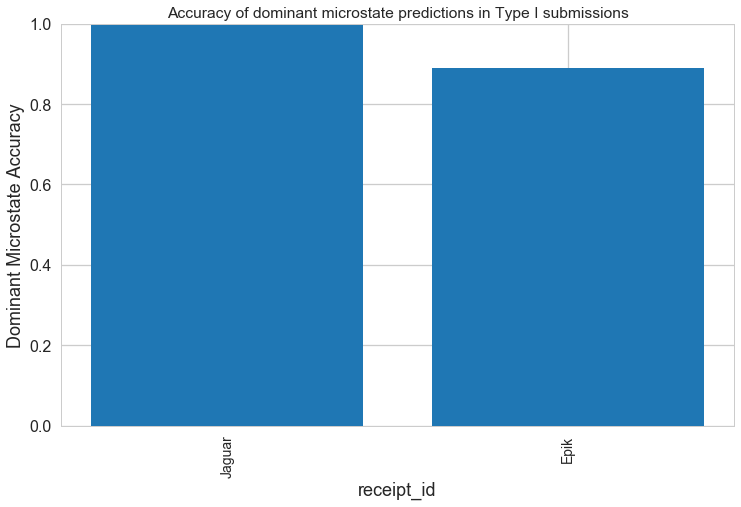

In [73]:
df_dom_ms_stats_sorted = df_dom_ms_stats.sort_values(by="Dominant Microstate Accuracy", ascending=False)

barplot(df = df_dom_ms_stats_sorted, 
        x_label = "receipt_id", 
        y_label = "Dominant Microstate Accuracy", 
        title = "Accuracy of dominant microstate predictions in Type I submissions" )
plt.savefig("typeI_dominant_microstate_accuracy.pdf")

In [74]:
# Calculate dominant microstate match accuracy for each method for neutral and +1 charge state separately

charges_to_be_calculated = [0, 1]

for charge in charges_to_be_calculated:
    df_dom_ms_stats["Dominant Microstate Accuracy of Charge {}".format(str(charge))] = np.NaN

    for receipt_id in submission_IDs:
        # Take subset of dominant microstate collection based on submission ID
        df_1submission = df_dom_ms_match[df_dom_ms_match["receipt_id"] == receipt_id]

        match_values_of_1charge = df_1submission["charge {} match".format(charge)].values
        match_values_array = np.array(match_values_of_1charge)       

        # Calculate overall dominant microstate match accuracy ignoring NaNs
        accuracy = np.nanmean(match_values_array)
        
        # Record accuracy value to the dataframe
        df_dom_ms_stats.loc[df_dom_ms_stats["receipt_id"] == receipt_id, "Dominant Microstate Accuracy of Charge {}".format(str(charge))] = accuracy
        
df_dom_ms_stats

,Dominant Microstate Accuracy,receipt_id,Dominant Microstate Accuracy of Charge 0,Dominant Microstate Accuracy of Charge 1
0,1.000000,Jaguar,1.0,1.00
1,0.888889,Epik,1.0,0.75


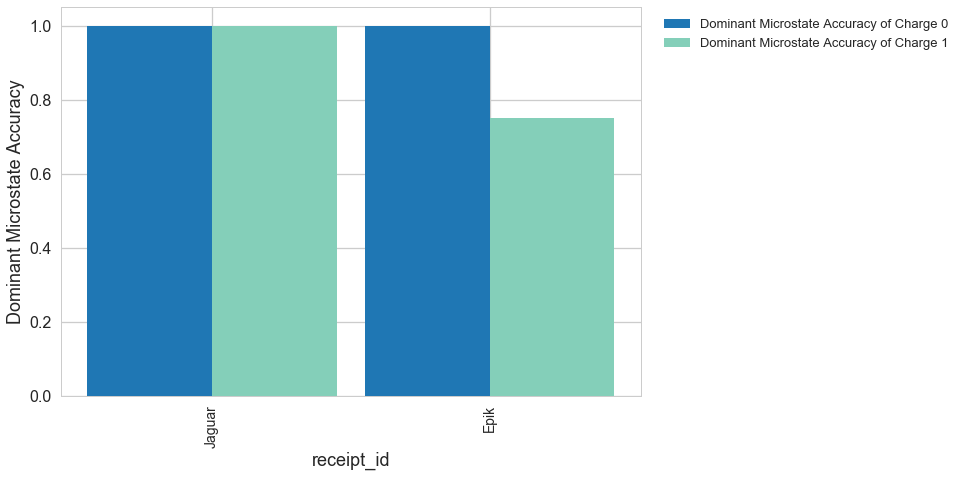

In [97]:
barplot_with_2groups(df = df_dom_ms_stats, 
                     x_label = "receipt_id", 
                     y_label1 = "Dominant Microstate Accuracy of Charge 0", 
                     y_label2 = "Dominant Microstate Accuracy of Charge 1")
plt.savefig("typeI_dominant_microstate_accuracy_separate_charges.pdf")

## 3.2 Calculate overall dominant microstate match accuracy for each molecule

In [75]:
# Plot dominant microstate error vs Molecule ID

# Save data in a list of dictionaries to convert to dataframe later
dom_ms_stats = []

mol_IDs = set(df_dom_ms_match["Molecule ID"].values)

for mol_ID in mol_IDs:
    # Take subset of dominant microstate collection based on molecule ID
    df_1molecule = df_dom_ms_match[df_dom_ms_match["Molecule ID"] == mol_ID]
    #print(mol_ID)
    #print("df_1molecule:\n", df_1molecule)
    
    match_values = []
    for charge in charges_of_exp_ms:
        match_values_of_1charge = df_1molecule["charge {} match".format(charge)].values
        #print(match_values_of_1charge)
        for value in match_values_of_1charge:
            match_values.append(value)
    match_values_array = np.array(match_values)       
    #print(match_values_array)

    # Calculate overall dominant microstate match accuracy ignoring NaNs
    accuracy = np.nanmean(match_values_array)
    #print("Accuracy:", accuracy)

    dom_ms_stats.append({
            'Molecule ID': mol_ID,
            'Dominant Microstate Accuracy': accuracy
    })

df_dom_ms_stats_mol_wise = pd.DataFrame(data=dom_ms_stats)
df_dom_ms_stats_mol_wise

,Dominant Microstate Accuracy,Molecule ID
0,0.75,SM07
1,1.00,SM13
2,1.00,SM02
3,0.75,SM04
4,1.00,SM14
5,1.00,SM15
6,1.00,SM12
7,1.00,SM09


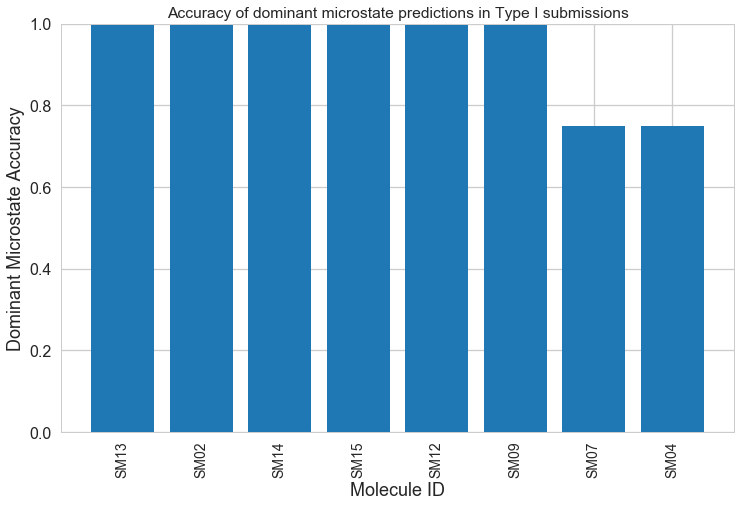

In [63]:
df_dom_ms_stats_mol_wise_sorted = df_dom_ms_stats_mol_wise.sort_values(by="Dominant Microstate Accuracy", ascending=False)

barplot(df = df_dom_ms_stats_mol_wise_sorted, 
        x_label = "Molecule ID", 
        y_label = "Dominant Microstate Accuracy", 
        title = "Accuracy of dominant microstate predictions in Type I submissions" )
plt.savefig("typeI_dominant_microstate_accuracy_for_each_molecule.pdf")

In [78]:
# Calculate dominant microstate match accuracy for each molecule for neutral and +1 charge state separately

charges_to_be_calculated = [0, 1]

for charge in charges_to_be_calculated:
    df_dom_ms_stats_mol_wise["Dominant Microstate Accuracy of Charge {}".format(str(charge))] = np.NaN

    for mol_ID in mol_IDs:
        # Take subset of dominant microstate collection based on submission ID
        df_1molecule = df_dom_ms_match[df_dom_ms_match["Molecule ID"] == mol_ID]

        match_values_of_1charge = df_1molecule["charge {} match".format(charge)].values
        match_values_array = np.array(match_values_of_1charge)       

        # Calculate overall dominant microstate match accuracy ignoring NaNs
        accuracy = np.nanmean(match_values_array)
        
        # Record accuracy value to the dataframe
        df_dom_ms_stats_mol_wise.loc[df_dom_ms_stats_mol_wise["Molecule ID"] == mol_ID, "Dominant Microstate Accuracy of Charge {}".format(str(charge))] = accuracy
        
df_dom_ms_stats_mol_wise

,Dominant Microstate Accuracy,Molecule ID,Dominant Microstate Accuracy of Charge 0,Dominant Microstate Accuracy of Charge 1
0,0.75,SM07,1.0,0.5
1,1.00,SM13,1.0,1.0
2,1.00,SM02,1.0,1.0
3,0.75,SM04,1.0,0.5
4,1.00,SM14,1.0,1.0
5,1.00,SM15,1.0,1.0
6,1.00,SM12,1.0,1.0
7,1.00,SM09,1.0,1.0


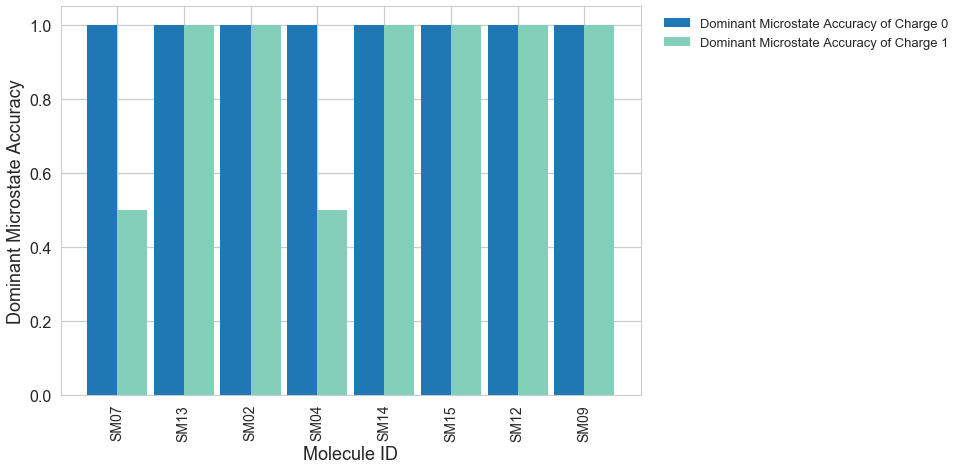

In [96]:
barplot_with_2groups(df = df_dom_ms_stats_mol_wise, 
                     x_label = "Molecule ID", 
                     y_label1 = "Dominant Microstate Accuracy of Charge 0", 
                     y_label2 = "Dominant Microstate Accuracy of Charge 1")
plt.savefig("typeI_dominant_microstate_accuracy_for_each_molecule_separate_charges.pdf")